<a href="https://colab.research.google.com/github/MounikaBandaru8/cavity-detection/blob/main/cavity_detec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as  np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/drive/MyDrive/train1c'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  799


#Printing the name of the images



In [4]:
file_names = os.listdir('/content/drive/MyDrive/train1c')
print(file_names)

['cav 1.jpg', 'cav 3.jpg', 'cav 4.jpg', 'cav 5.jpg', 'cav 6.jpg', 'cav 7.jpg', 'cav 8.jpg', 'cav 9.jpg', 'cav 10.jpg', 'cav 11.jpg', 'cav 12.jpg', 'cav 13.jpg', 'cav 13.png', 'cav 14.jpg', 'cav 16.png', 'cav 16.jpg', 'cav 18.jpg', 'cav 19.jpg', 'cav 20.jpg', 'cav 21.jpg', 'cav 22.jpg', 'cav 23.jpg', 'cav 24.jpeg', 'cav 29.jpg', 'cav 25.jpeg', 'cav 26.jpg', 'cav 28.png', 'cav 27.jpg', 'cav 30.jpg', 'cav 31.jpg', 'cav 32.jpg', 'cav 33.png', 'cav 34.png', 'cav 35.jpg', 'cav 36.jpg', 'nocav 1hw.jpg', 'nocav 2hw.jpg', 'cav 37.jpg', 'cav 38.jpg', 'cav 39.jpg', 'cav 40.jpg', 'cav 41.jpg', 'cav 42.jpg', 'cav 43.jpg', 'nocav 3.jpg', 'nocav 4.jpg', 'cav 44.jpg', 'nocav 5.jpg', 'nocav 6.jpg', 'cav 45.jpg', 'nocav 7.png', 'nocav 7.jpg', 'cav 46.jpg', 'cav 47.png', 'cav 47.jpg', 'cav 48.png', 'cav 48.jpg', 'cav 49.jpg', 'cav 50.jpg', 'cav 50.png', 'cav 51.png', 'cav 52.jpg', 'cav 53.jpg', 'cav 54.jpg', 'cav 55.jpg', 'cav 56.jpg', 'cav 57.jpg', 'cav 58.jpg', 'cav 59.jpg', 'cav 60.jpg', 'cav 61.jpg',

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

#Displaying the image of cavity and non cavity

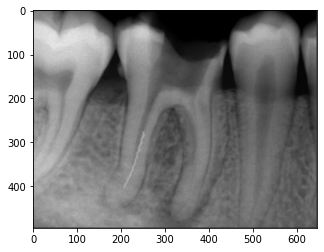

In [6]:
# display cavity image
img = mpimg.imread('/content/drive/MyDrive/train1c/cav 67.jpg')
imgplt = plt.imshow(img)
plt.show()

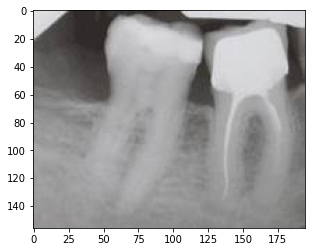

In [7]:
# display noncavity image
img = mpimg.imread('/content/drive/MyDrive/train1c/nocav 238.jpg')
imgplt = plt.imshow(img)
plt.show()

In [8]:
file_names = os.listdir('/content/drive/MyDrive/cavity')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

cav
cav
cav
cav
cav


In [9]:
file_names = os.listdir('/content/drive/MyDrive/train1c')

cav_count = 0
noc_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'cav':
    cav_count += 1

  else:
    noc_count += 1

print('Number of cavity images =', cav_count)
print('Number of noncavity images =', noc_count)

Number of cavity images = 398
Number of noncavity images = 402


Resizing all the images

In [10]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [11]:
original_folder = '/content/drive/MyDrive/train1c/'
resized_folder = '/content/image resized/'

for i in range(799):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


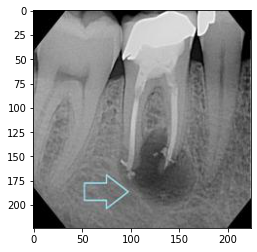

In [12]:
#display resized cav image
img = mpimg.imread('/content/image resized/cav 1.jpg')
imgplt = plt.imshow(img)
plt.show()

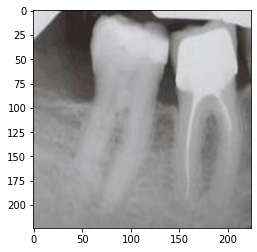

In [13]:
# display resized nocav image
img = mpimg.imread('/content/image resized/nocav 238.jpg')
imgplt = plt.imshow(img)
plt.show()

#creating labels for resized images of dogs and cats

In [15]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(799):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'cav':
    labels.append(1)

  else:
    labels.append(0)

In [16]:
print(filenames[0:5])
print(len(filenames))

['cav 208.jpg', 'cav 31.jpg', 'nocav 477.jpg', 'cav 85.jpg', 'nocav 191.jpg']
799


In [17]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 1, 0]
799


In [18]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[401 398]


#Converting all resized images to numpy arrays


In [19]:
import cv2
import glob

In [20]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg','jpeg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

cav_noc_images = np.asarray([cv2.imread(file) for file in files])

In [21]:
print(cav_noc_images)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[253 253 255]
   [253 253 253]
   [149 151 133]
   ...
   [255 255 255]
   [253 253 255]
   [253 253 253]]

  [[253 253 255]
   [253 253 253]
   [149 151 133]
   ...
   [255 255 255]
   [253 253 255]
   [253 253 253]]

  [[253 253 253]
   [233 235 231]
   [114 114  96]
   ...
   [255 255 255]
   [253 253 255]
   [255 255

In [22]:
type(cav_noc_images)

numpy.ndarray

In [23]:
print(cav_noc_images.shape)

(799, 224, 224, 3)


In [24]:
# cav 44 and nocav 194
X = cav_noc_images
Y = np.asarray(labels)

#Train Test Split


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=3)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(799, 224, 224, 3) (639, 224, 224, 3) (160, 224, 224, 3)


In [27]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [28]:
print(X_train_scaled)

[[[[0.29019608 0.29019608 0.29019608]
   [0.52941176 0.52941176 0.52941176]
   [0.84313725 0.84313725 0.84313725]
   ...
   [0.71372549 0.71372549 0.71372549]
   [0.47843137 0.47843137 0.47843137]
   [0.29803922 0.29803922 0.29803922]]

  [[0.29019608 0.29019608 0.29019608]
   [0.5254902  0.5254902  0.5254902 ]
   [0.82745098 0.82745098 0.82745098]
   ...
   [0.70196078 0.70196078 0.70196078]
   [0.4745098  0.4745098  0.4745098 ]
   [0.29803922 0.29803922 0.29803922]]

  [[0.29019608 0.29019608 0.29019608]
   [0.52941176 0.52941176 0.52941176]
   [0.83529412 0.83529412 0.83529412]
   ...
   [0.65882353 0.65882353 0.65882353]
   [0.45098039 0.45098039 0.45098039]
   [0.29803922 0.29803922 0.29803922]]

  ...

  [[0.3254902  0.3254902  0.3254902 ]
   [0.21176471 0.21176471 0.21176471]
   [0.05490196 0.05490196 0.05490196]
   ...
   [0.03921569 0.03921569 0.03921569]
   [0.20784314 0.20784314 0.20784314]
   [0.3254902  0.3254902  0.3254902 ]]

  [[0.3254902  0.3254902  0.3254902 ]
   [0.2

#Building nueral network

In [29]:
import tensorflow as tf
import tensorflow_hub as hub

In [30]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [31]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [32]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [33]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
20/20 [==============================] - 33s 1s/step - loss: 0.7955 - acc: 0.5070
Epoch 2/5
20/20 [==============================] - 27s 1s/step - loss: 0.6967 - acc: 0.5775
Epoch 3/5
20/20 [==============================] - 34s 2s/step - loss: 0.6521 - acc: 0.6135
Epoch 4/5
20/20 [==============================] - 32s 2s/step - loss: 0.6111 - acc: 0.6682
Epoch 5/5
20/20 [==============================] - 29s 1s/step - loss: 0.6292 - acc: 0.6463


In [34]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

5/5 [==============================] - 11s 2s/step - loss: 0.8055 - acc: 0.5250
Test Loss = 0.8054823875427246
Test Accuracy = 0.5249999761581421


Path of the image to be predicted: /content/man2.jpg


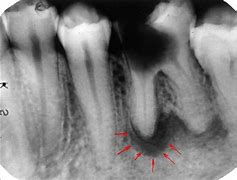

1/1 [==============================] - 0s 63ms/step
[[0.279946   0.38426206]]
1
The image represents a cav


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a nocav')

else:
  print('The image represents a cav')